## 👑DATA SCHOOL PROJECT01
┗ 매출/수익분석 및 대시보드 기획
목차(Context)

- 프로젝트 Summary
- 문제상황 Introduction

## 문제상황 Introduction

#### 시나리오

회사 A는 최근 몇 달 동안 예상보다 더디게 매출과 수익 증가를 경험하였다. 이 변화의 원인을 파악하고 전략을 세우기 위해, 경영진은 여러 부서의 데이터를 통합하여  
분석할 수 있는 대시보드의 필요성을 느끼게 되었다. 따라서, 데이터 분석 팀은 "매출/수익분석 및 대시보드 기획" 프로젝트를 시작하여 데이터 EDA, 대시보드
화면 설계 및 핵심 지표의 기획과 개발 작업을 진행하고자 한다.

#### 문제정의
- 부서별 미미한 예상 매출 및 수익 증가

#### 기대효과
- 데이터 분석 대시보드 구현에 따른 매출 및 수익 원인 파악 후 극대화 전략 수립

#### 해결방안
- 매출과 수익이 예상보다 더디게 증가하는 원인 파악
- 매출 및 수익의 감소, 증가에 영향을 미치는 주요요인과 추세 파악

#### 성과측정


In [1]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('P_PJT01_DATA.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 🔈Process01

· Data 전처리
수집된 데이터의 기본 정보들을 확인

(1) Data shape(형태) 확인

(2) Data type 확인

(3) Null값 확인 (※ 빈 값의 Data)

(4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

In [2]:
df.shape

(9993, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 컬럼 삭제

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df = df.drop('Postal Code', axis=1)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df = df.drop('Country', axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### State별 Profit 확인

In [9]:
# state 확인
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

### 판매량 구하기

In [10]:
# 컬럼명 변경
df.rename(columns={'Sales':'Price'}, inplace=True)
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Price', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
# 판매량 구하기
# df['판매량'] = df['이익'] / (df['단가'] * (1 - df['할인률']))

df['Sales'] = df['Profit'] / (df['Price'] * (1 - df['Discount']))
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.160000
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.300000
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.470000
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.727273
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.140625


In [12]:
df.sort_values(by='Sales', ascending=False)
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.160000
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.300000
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.470000
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.727273
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.140625
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,0.290000
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656,0.270000
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152,0.125000
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,0.390625
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,0.300000


#### Region별 판매량 차이

In [13]:
# Region 확인
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
sales_pivot = df.pivot_table(index='Region', aggfunc='sum')
sales_pivot

,Category,City,Discount,Price,Profit,Quantity,Sales,Segment,Ship Mode,State,Sub-Category
Region,,,,,,,,,,,
Central,Office SuppliesOffice SuppliesOffice SuppliesO...,Fort WorthFort WorthMadisonFremontFremontHoust...,558.34,501239.8908,39706.3625,8780,-2558.943493,Home OfficeHome OfficeConsumerCorporateCorpora...,Standard ClassStandard ClassStandard ClassStan...,TexasTexasWisconsinNebraskaNebraskaTexasTexasT...,AppliancesBindersStorageArtAppliancesPaperPhon...
East,FurnitureFurnitureOffice SuppliesFurnitureOffi...,PhiladelphiaPhiladelphiaPhiladelphiaPhiladelph...,414.00,678781.2400,91522.7800,10618,142.977925,ConsumerConsumerConsumerConsumerConsumerConsum...,Second ClassStandard ClassStandard ClassStanda...,PennsylvaniaPennsylvaniaPennsylvaniaPennsylvan...,ChairsBookcasesBindersFurnishingsEnvelopesArtB...
South,FurnitureFurnitureFurnitureOffice SuppliesOffi...,HendersonHendersonFort LauderdaleFort Lauderda...,238.55,391721.9050,46749.4303,6209,51.558466,ConsumerConsumerConsumerConsumerConsumerCorpor...,Second ClassSecond ClassStandard ClassStandard...,KentuckyKentuckyFloridaFloridaNorth CarolinaFl...,BookcasesChairsTablesStoragePaperStoragePaperC...
West,Office SuppliesFurnitureOffice SuppliesTechnol...,Los AngelesLos AngelesLos AngelesLos AngelesLo...,350.20,725214.6645,108345.5009,12264,538.021146,CorporateConsumerConsumerConsumerConsumerConsu...,Second ClassStandard ClassStandard ClassStanda...,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...,LabelsFurnishingsArtPhonesBindersAppliancesTab...


In [15]:
# 지역별로 상세 확인
df1 = df[df['Region']=='Central'].sort_values(by=['Sales'])
df2 = df[df['Region']=='East'].sort_values(by=['Sales'])
df3 = df[df['Region']=='South'].sort_values(by=['Sales'])
df4 = df[df['Region']=='West'].sort_values(by=['Sales'])

df1.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,-13.75
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,-13.75
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,-13.75
676,Standard Class,Consumer,Tyler,Texas,Central,Office Supplies,Appliances,2.688,3,0.8,-7.3920,-13.75
4980,Second Class,Corporate,Chicago,Illinois,Central,Office Supplies,Appliances,4.356,2,0.8,-11.7612,-13.50
4437,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,26.406,3,0.8,-71.2962,-13.50
6989,First Class,Consumer,Abilene,Texas,Central,Office Supplies,Appliances,1.392,2,0.8,-3.7584,-13.50
6561,First Class,Corporate,Arlington,Texas,Central,Office Supplies,Appliances,33.620,5,0.8,-90.7740,-13.50
6903,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Appliances,5.588,2,0.8,-15.0876,-13.50
8916,Standard Class,Corporate,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,-13.50


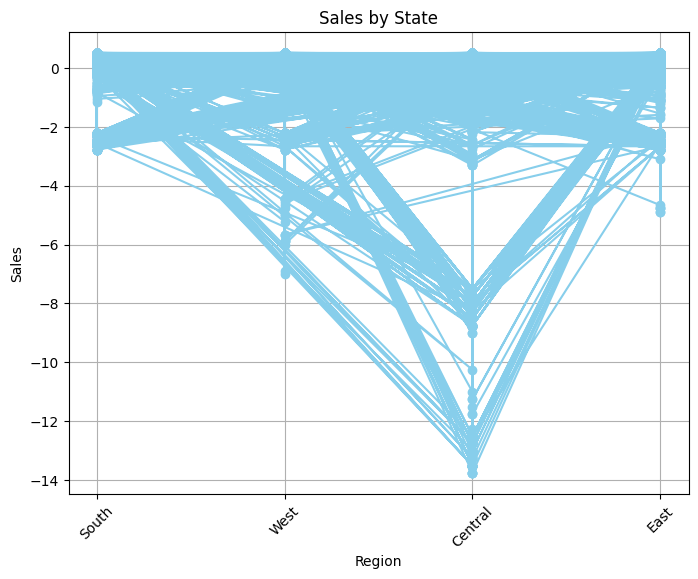

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df['Region'], df['Sales'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by State')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

#### 분석 결과
- Central 지역의 판매율이 매우 낮음
- Central 지역은 할인률이 높음
- 할인률이 높을수록 이익률과 판매량이 낮아짐


## 2. 변수별 매출 영향 분석

In [17]:
df1.head(3)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.617,-13.75
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.602,-13.75
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.466,-13.75


In [18]:
# Category와 매출의 관계 분석
df1.groupby('Category')['Sales'].mean()

Category
Furniture         -0.527246
Office Supplies   -1.677770
Technology         0.191550
Name: Sales, dtype: float64

In [19]:
# Sub-Category와 매출의 관계 분석
df1.groupby('Sub-Category')['Sales'].mean()

Sub-Category
Accessories    0.201055
Appliances    -6.766487
Art            0.242322
Binders       -4.987814
Bookcases     -0.132576
Chairs        -0.027799
Copiers        0.414023
Envelopes      0.444640
Fasteners      0.316239
Furnishings   -1.055610
Labels         0.449868
Machines       0.014987
Paper          0.445917
Phones         0.183594
Storage        0.035268
Supplies       0.028264
Tables        -0.365215
Name: Sales, dtype: float64

In [20]:
# Sub-Category와 매출의 관계 분석
df4.groupby('Sub-Category')['Sales'].mean()

Sub-Category
Accessories    0.243990
Appliances     0.268620
Art            0.288425
Binders       -0.042562
Bookcases     -0.982028
Chairs         0.026872
Copiers        0.387125
Envelopes      0.471726
Fasteners      0.314288
Furnishings    0.308289
Labels         0.470695
Machines      -0.534544
Paper          0.467492
Phones         0.107175
Storage        0.130336
Supplies       0.162237
Tables        -0.151379
Name: Sales, dtype: float64

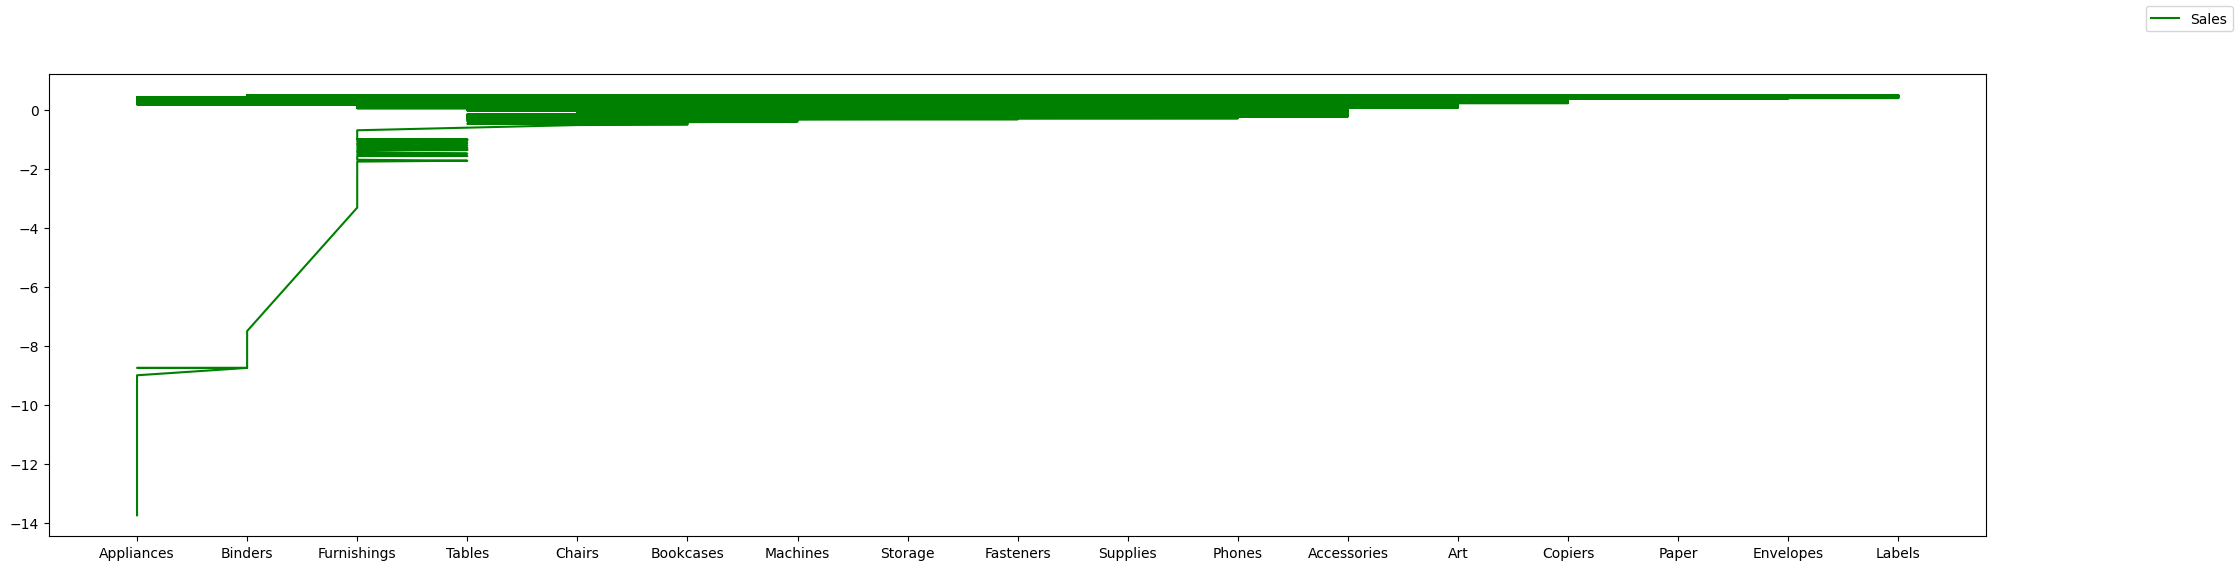

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Sub-Category'], df1['Sales'], color='green', label='Sales')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

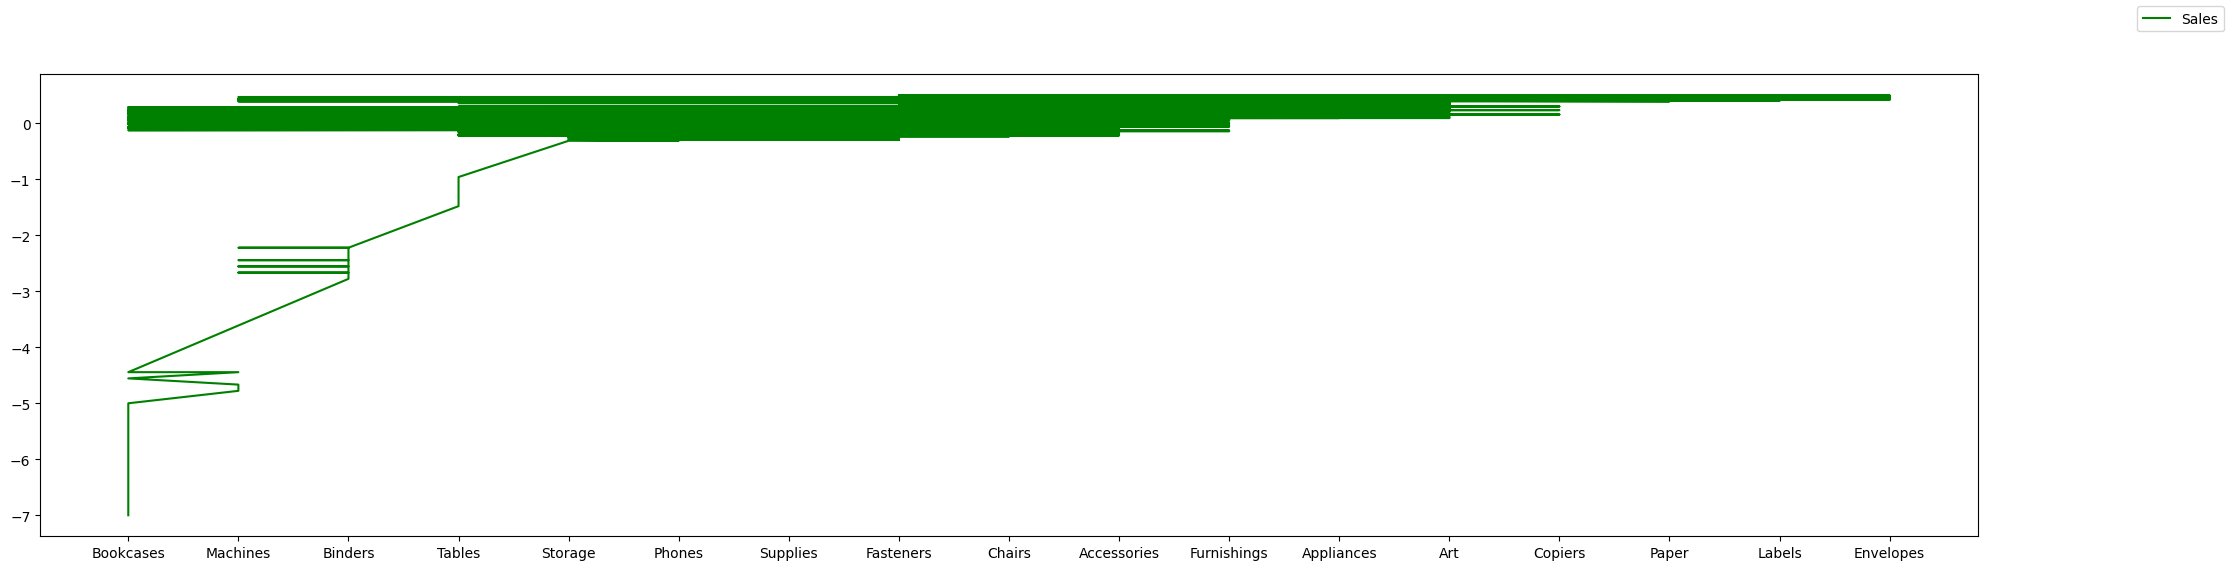

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(df4['Sub-Category'], df4['Sales'], color='green', label='Sales')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

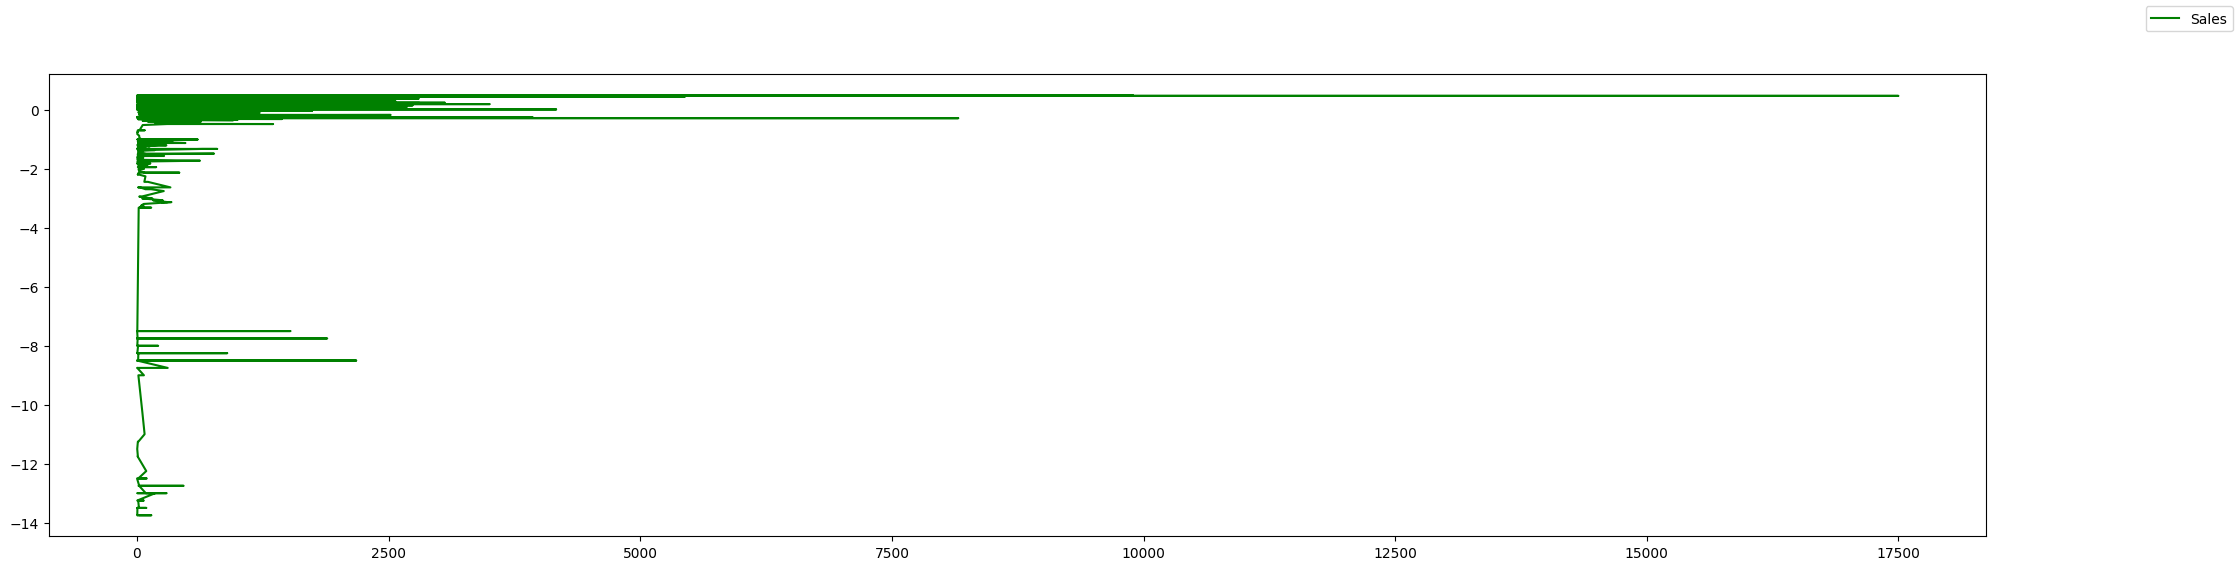

In [23]:
# 가격과 판매량 확인
fig, ax1 = plt.subplots()
ax1.plot(df1['Price'], df1['Sales'], color='green', label='Sales')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

In [24]:
df[df['Sales'] > 0].sort_values(by='Sales', ascending=False).head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
9837,Standard Class,Consumer,Long Beach,California,West,Office Supplies,Labels,29.60,2,0.0,14.800,0.5
9492,Same Day,Consumer,Oklahoma City,Oklahoma,Central,Office Supplies,Binders,38.16,9,0.0,19.080,0.5
534,Second Class,Consumer,Montgomery,Alabama,South,Office Supplies,Binders,22.75,5,0.0,11.375,0.5
7457,First Class,Consumer,Waynesboro,Virginia,South,Office Supplies,Binders,9.14,1,0.0,4.570,0.5
4137,Standard Class,Consumer,Alexandria,Virginia,South,Office Supplies,Fasteners,25.06,7,0.0,12.530,0.5


In [127]:
df[df['Sales'] < 0].sort_values(by='Sales').head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,-13.75
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,-13.75
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,-13.75
676,Standard Class,Consumer,Tyler,Texas,Central,Office Supplies,Appliances,2.688,3,0.8,-7.3920,-13.75
4980,Second Class,Corporate,Chicago,Illinois,Central,Office Supplies,Appliances,4.356,2,0.8,-11.7612,-13.50


In [113]:
# ▶ State df
df1 = df[df['State']=='Ohio'].sort_values(by=['Profit'])
df1.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780,-4.888889
3151,First Class,Consumer,Newark,Ohio,East,Technology,Machines,1799.994,2,0.7,-2639.9912,-4.888889
215,Standard Class,Corporate,Medina,Ohio,East,Technology,Machines,1188.000,9,0.7,-950.4000,-2.666667
2628,First Class,Corporate,Springfield,Ohio,East,Technology,Machines,652.995,7,0.7,-935.9595,-4.777778
6639,Second Class,Corporate,Lorain,Ohio,East,Furniture,Tables,1421.664,8,0.4,-734.5264,-0.861111
7649,Standard Class,Corporate,Marion,Ohio,East,Furniture,Tables,1548.990,9,0.4,-464.6970,-0.500000
223,First Class,Consumer,Dublin,Ohio,East,Technology,Machines,479.988,4,0.7,-383.9904,-2.666667
7509,Standard Class,Consumer,Columbus,Ohio,East,Technology,Phones,1889.946,9,0.4,-377.9892,-0.333333
9092,Second Class,Corporate,Troy,Ohio,East,Furniture,Bookcases,482.940,6,0.5,-376.6932,-1.560000
7771,Standard Class,Consumer,Lancaster,Ohio,East,Office Supplies,Binders,456.588,2,0.7,-304.3920,-2.222222


In [114]:
# 판매량 하위 10개 확인
df.sort_values(by=['Sales'], ascending=False).head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
6394,Standard Class,Consumer,New York City,New York,East,Furniture,Furnishings,396.92,4,0.0,198.460,0.5
8487,Standard Class,Home Office,Fresno,California,West,Office Supplies,Paper,11.94,3,0.0,5.970,0.5
6921,Standard Class,Home Office,New York City,New York,East,Office Supplies,Envelopes,16.98,1,0.0,8.490,0.5
8523,Standard Class,Consumer,San Francisco,California,West,Office Supplies,Paper,55.86,7,0.0,27.930,0.5
720,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Paper,146.82,3,0.0,73.410,0.5
3681,Standard Class,Consumer,Clinton,Maryland,East,Office Supplies,Binders,84.09,3,0.0,42.045,0.5
5850,Standard Class,Home Office,Roseville,Minnesota,Central,Technology,Copiers,549.99,1,0.0,274.995,0.5
2300,Standard Class,Consumer,Midland,Michigan,Central,Office Supplies,Binders,12.72,3,0.0,6.360,0.5
4554,Second Class,Consumer,La Crosse,Wisconsin,Central,Office Supplies,Binders,56.82,3,0.0,28.410,0.5
1504,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Art,6.72,4,0.0,3.360,0.5


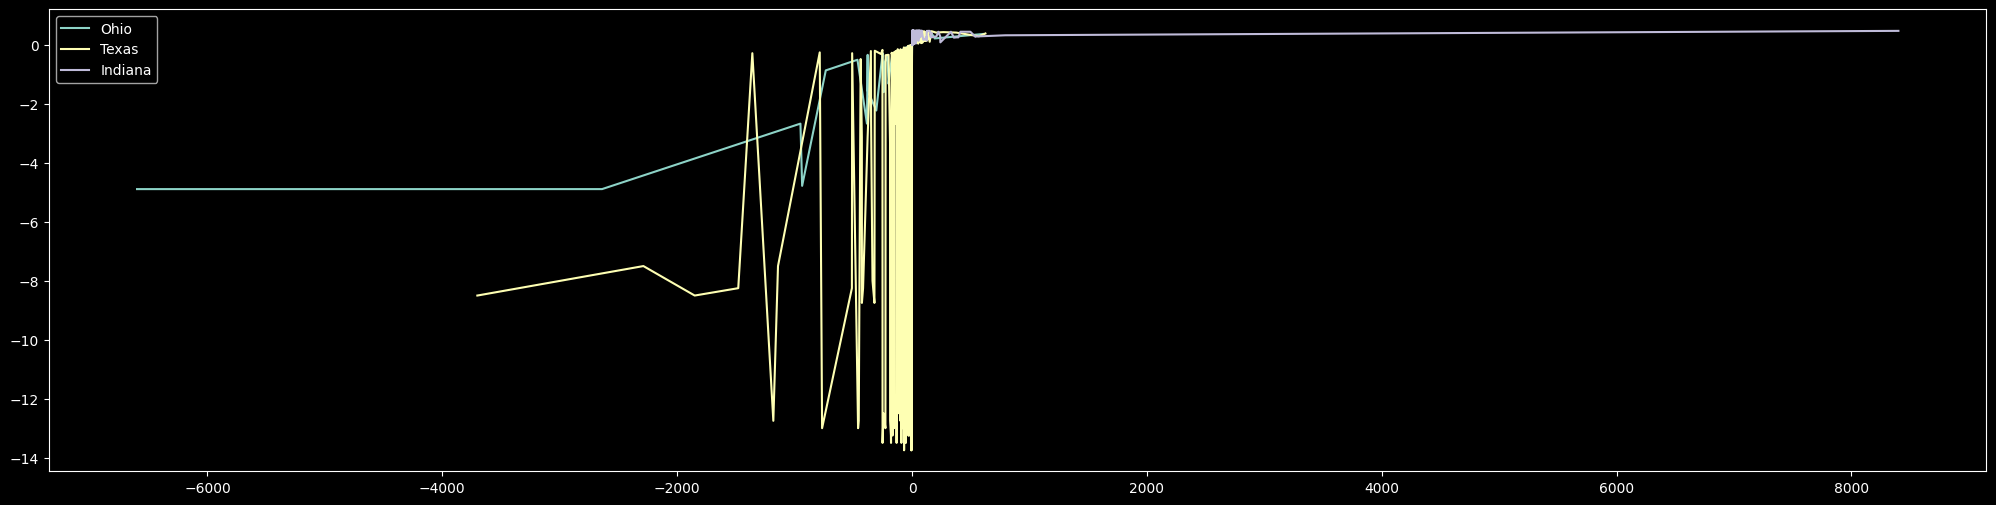

In [115]:
# ▶ State별 이익률 차이 발생
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df1['Profit'], df1['Sales'], label='Ohio');
plt.gcf().set_size_inches(25, 6)

df2 = df[df['State']=='Texas'].sort_values(by=['Profit'])
plt.plot(df2['Profit'], df2['Sales'], label='Texas');
plt.gcf().set_size_inches(25, 6)

df3 = df[df['State']=='Indiana'].sort_values(by=['Profit'])
plt.plot(df3['Profit'], df3['Sales'], label='Indiana');
plt.gcf().set_size_inches(25, 6)

plt.legend()

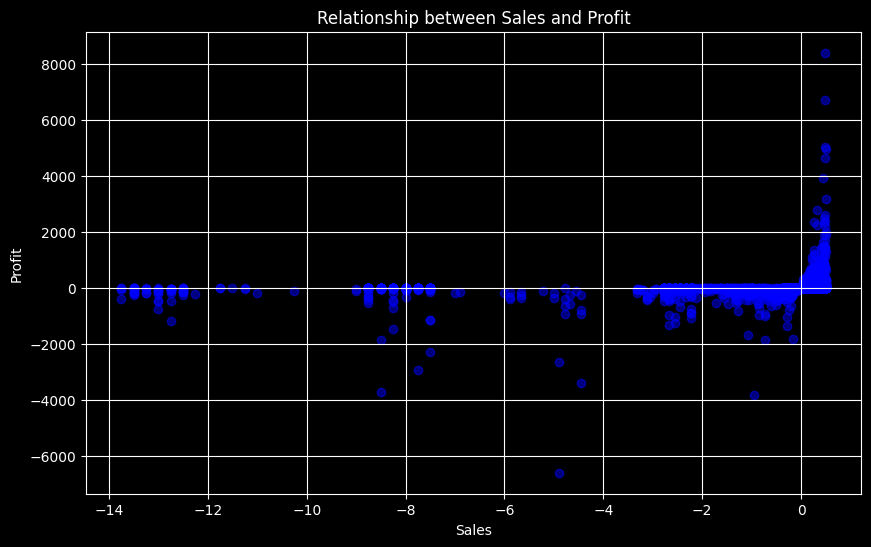

In [116]:
# 판매량과 수익률의 관계
import pandas as pd
import matplotlib.pyplot as plt

# Sales와 Profit 간의 관계를 시각화합니다.
# -> sales가 증가함에 따라 profit이 증가하는지 확인 필요
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='blue', alpha=0.5)
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

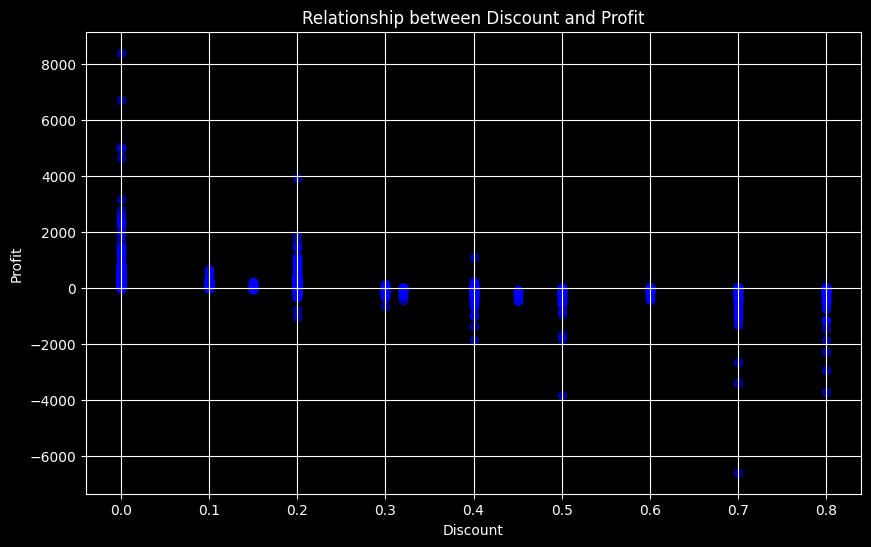

In [117]:
# 할인률과 수익률의 관계
import pandas as pd
import matplotlib.pyplot as plt

# Sales와 Profit 간의 관계를 시각화합니다.
# -> sales가 증가함에 따라 profit이 증가하는지 확인 필요
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], color='blue', alpha=0.5)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

#### 의문점

1) 할인률이 높을 수록 적자
- 할인률과 상품과의 관계 (특정 상품이 할인률이 낮은 건지?)
- State와 할인률의 관계 (State에 따라 판매저하로 인한 수익감소인지?)

In [36]:
# 할인률이 높은 상품 확인 -> 할인률이 높을 수록 적자.
df.sort_values('Discount', ascending=False).head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3259,Standard Class,Home Office,Highland Park,Illinois,Central,Office Supplies,Binders,3.136,2,80.0,-4.7040
1857,Second Class,Corporate,Houston,Texas,Central,Office Supplies,Binders,34.240,4,80.0,-53.0720
9687,Standard Class,Home Office,Arlington,Texas,Central,Office Supplies,Binders,11.646,9,80.0,-17.4690
1820,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Appliances,92.064,6,80.0,-225.5568
2846,Standard Class,Home Office,Chicago,Illinois,Central,Office Supplies,Binders,762.594,3,80.0,-1143.8910
4703,Standard Class,Corporate,Houston,Texas,Central,Office Supplies,Appliances,8.712,2,80.0,-19.6020
679,Standard Class,Consumer,Tyler,Texas,Central,Office Supplies,Binders,182.994,3,80.0,-320.2395
676,Standard Class,Consumer,Tyler,Texas,Central,Office Supplies,Appliances,2.688,3,80.0,-7.3920
7074,Standard Class,Consumer,Mcallen,Texas,Central,Office Supplies,Binders,4.752,4,80.0,-8.3160
662,Standard Class,Consumer,Arlington,Texas,Central,Office Supplies,Binders,2.724,3,80.0,-4.2222


In [37]:
# 판매 상품들만 확인
df[(df['Sub-Category'] == 'Binders') & (df['State'] == 'Texas')]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,80.0,-3.8160
75,First Class,Corporate,Houston,Texas,Central,Office Supplies,Binders,1.248,3,80.0,-1.9344
280,Second Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,2.080,5,80.0,-3.4320
380,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,12.176,4,80.0,-18.8728
521,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,14.112,9,80.0,-21.1680
...,...,...,...,...,...,...,...,...,...,...,...
9776,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,16.784,4,80.0,-26.8544
9778,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,8.880,5,80.0,-13.3200
9794,Second Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,18.240,3,80.0,-31.0080
9835,First Class,Consumer,La Porte,Texas,Central,Office Supplies,Binders,16.392,2,80.0,-26.2272


In [38]:
# texas의 이익률 확인
df1 = df[df['State'] == 'Texas'].sort_values(by=['Profit'])
df1.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,80.0,-3701.8928
5310,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,80.0,-2287.7820
1199,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,80.0,-1850.9464
3324,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,896.990,5,80.0,-1480.0335
165,Standard Class,Consumer,San Antonio,Texas,Central,Technology,Machines,8159.952,8,40.0,-1359.9920
4820,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Appliances,463.248,8,80.0,-1181.2824
8640,Standard Class,Corporate,Dallas,Texas,Central,Office Supplies,Binders,760.980,5,80.0,-1141.4700
5198,Standard Class,Consumer,Round Rock,Texas,Central,Office Supplies,Supplies,3930.072,3,20.0,-786.0144
1995,Second Class,Consumer,Houston,Texas,Central,Office Supplies,Appliances,294.620,5,80.0,-766.0120
6035,Standard Class,Consumer,Carrollton,Texas,Central,Office Supplies,Binders,310.392,4,80.0,-512.1468


In [39]:
# 이익률 하위 5개의 state 확인
df.sort_values(by=['Profit']).head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,70.0,-6599.9780
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,50.0,-3839.9904
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,80.0,-3701.8928
3011,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,70.0,-3399.9800
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,80.0,-2929.4845
3151,First Class,Consumer,Newark,Ohio,East,Technology,Machines,1799.994,2,70.0,-2639.9912
5310,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,80.0,-2287.7820
9639,Second Class,Consumer,Concord,North Carolina,South,Furniture,Tables,4297.644,13,40.0,-1862.3124
1199,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,80.0,-1850.9464
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,50.0,-1811.0784


In [40]:
# 수익률이 음수값이 데이터만 필터링
negative_profit_states = df[df['Profit'] <0]['State']
negative_profit_states.tolist()

['Florida',
 'Texas',
 'Texas',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'Texas',
 'Texas',
 'Texas',
 'Illinois',
 'Tennessee',
 'Tennessee',
 'Texas',
 'Texas',
 'Texas',
 'Illinois',
 'Oregon',
 'Illinois',
 'Illinois',
 'Colorado',
 'Colorado',
 'Colorado',
 'Tennessee',
 'Texas',
 'Illinois',
 'Arizona',
 'California',
 'Ohio',
 'Texas',
 'Texas',
 'Texas',
 'Texas',
 'Illinois',
 'Texas',
 'Ohio',
 'Ohio',
 'Pennsylvania',
 'Colorado',
 'Texas',
 'Ohio',
 'Ohio',
 'Ohio',
 'Ohio',
 'Ohio',
 'Tennessee',
 'North Carolina',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Illinois',
 'Illinois',
 'Illinois',
 'Illinois',
 'Illinois',
 'Illinois',
 'Texas',
 'Texas',
 'Texas',
 'Ohio',
 'Texas',
 'Florida',
 'Florida',
 'Ohio',
 'Colorado',
 'Colorado',
 'Illinois',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'Pennsylvania',
 'California',
 'Pennsylvania',
 'Texas',
 'New York',
 'Arizona',
 'Arizona',
 'Massachu

In [44]:
negative_profit_states.value_counts()

State
Texas             486
Pennsylvania      278
Illinois          255
Ohio              209
Florida           126
California        105
Arizona            85
North Carolina     68
Colorado           66
Tennessee          65
New York           47
Oregon             43
Washington         17
Massachusetts       5
Rhode Island        4
New Jersey          2
Delaware            2
Connecticut         2
Maryland            2
Nevada              1
New Mexico          1
New Hampshire       1
West Virginia       1
Name: count, dtype: int64

#### 🔉Process02
- 상관관계 분석

In [25]:
#할인률 변환
df['Discount'] = round(df['Discount'] * 100)
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.0,41.9136,0.160000
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.0,219.5820,0.300000
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.0,6.8714,0.470000
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,45.0,-383.0310,-0.727273
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,20.0,2.5164,0.140625
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.0,14.1694,0.290000
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.0,1.9656,0.270000
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,20.0,90.7152,0.125000
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,20.0,5.7825,0.390625
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.0,34.4700,0.300000


In [26]:
# 상품별 평균 할인률 계산
discount_rates = df.groupby('Sub-Category')['Discount'].mean()
print(discount_rates.sort_values(ascending=False))

Sub-Category
Binders        37.229153
Machines       30.608696
Tables         26.128527
Bookcases      21.114035
Chairs         17.017828
Appliances     16.688172
Copiers        16.176471
Phones         15.455568
Furnishings    13.834901
Fasteners       8.202765
Envelopes       8.031496
Accessories     7.845161
Supplies        7.684211
Paper           7.489051
Art             7.487437
Storage         7.470449
Labels          6.868132
Name: Discount, dtype: float64


In [28]:
# 상품별 수익 평균
sub_category_profit = df.groupby('Sub-Category')['Profit'].mean()
print(sub_category_profit.sort_values(ascending=False))

Sub-Category
Copiers        817.909190
Accessories     54.111788
Phones          50.073938
Chairs          43.095894
Appliances      38.849586
Machines        29.432669
Envelopes       27.418019
Storage         25.152277
Paper           24.856620
Binders         19.843574
Labels          15.236962
Furnishings     13.645918
Art              8.200737
Fasteners        4.375660
Supplies        -6.258418
Bookcases      -15.230509
Tables         -55.565771
Name: Profit, dtype: float64


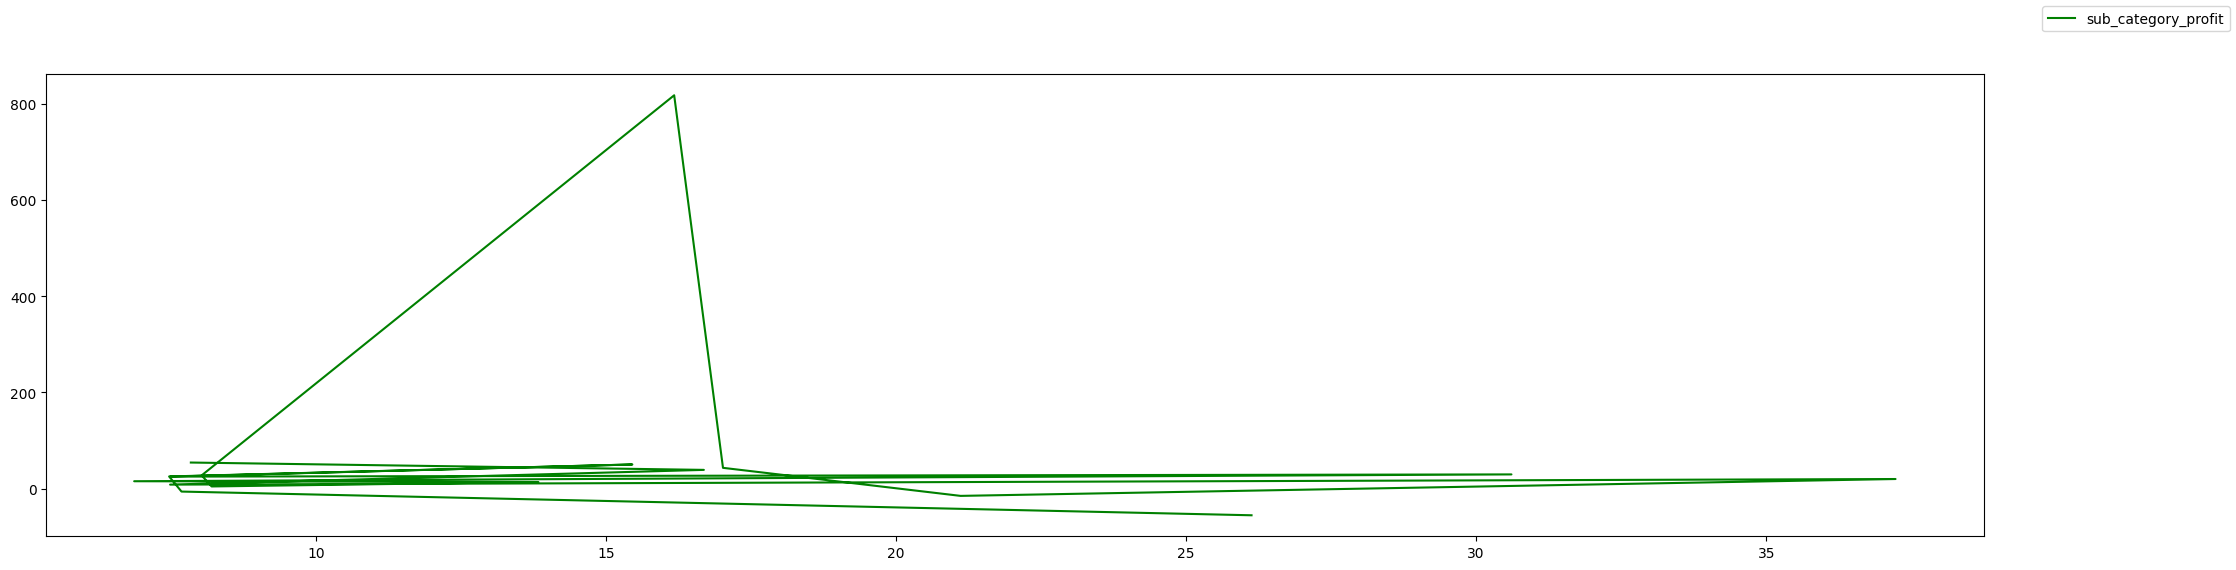

In [29]:
# 할인률이 15~17% 정도일 때 수익률이 높음
fig, ax1 = plt.subplots()
ax1.plot(discount_rates, sub_category_profit, color='green', label='sub_category_profit')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

## Process3

#### 1) 모델링을 위한 데이터 준비

In [46]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Price,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.0,41.9136,0.160000
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.0,219.5820,0.300000
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.0,6.8714,0.470000
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,45.0,-383.0310,-0.727273
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,20.0,2.5164,0.140625


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2323 entries, 8766 to 7595
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     2323 non-null   object 
 1   Segment       2323 non-null   object 
 2   City          2323 non-null   object 
 3   State         2323 non-null   object 
 4   Region        2323 non-null   object 
 5   Category      2323 non-null   object 
 6   Sub-Category  2323 non-null   object 
 7   Price         2323 non-null   float64
 8   Quantity      2323 non-null   int64  
 9   Discount      2323 non-null   float64
 10  Profit        2323 non-null   float64
 11  Sales         2323 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 235.9+ KB


In [56]:
# 모델링 학습을 위해 Feature(X)와 Y데이터를 구분

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['Ship Mode', 'Segment', 'City', 'Region', 'Category', 'Sub-Category', 'State'], axis=1)
Y=df['Sales']
print(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

         Price  Quantity  Discount    Profit     Sales
0     261.9600         2       0.0   41.9136  0.160000
1     731.9400         3       0.0  219.5820  0.300000
2      14.6200         2       0.0    6.8714  0.470000
3     957.5775         5      45.0 -383.0310 -0.727273
4      22.3680         2      20.0    2.5164  0.140625
...        ...       ...       ...       ...       ...
9988  206.1000         5       0.0   55.6470  0.270000
9989   25.2480         3      20.0    4.1028  0.203125
9990   91.9600         2       0.0   15.6332  0.170000
9991  258.5760         2      20.0   19.3932  0.093750
9992   29.6000         4       0.0   13.3200  0.450000

[9993 rows x 5 columns]
(5995, 5)
(5995,)
(3998, 5)
(3998,)


#### 2. 모델 학습 및 평가

In [57]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [58]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.049076596337516695
r2_score(r2):  0.9978171559947302

mae_test(mae):  0.04902880758190962
r2_score(r2):  0.9981512005246019


#### 3. 중요 변수 파악

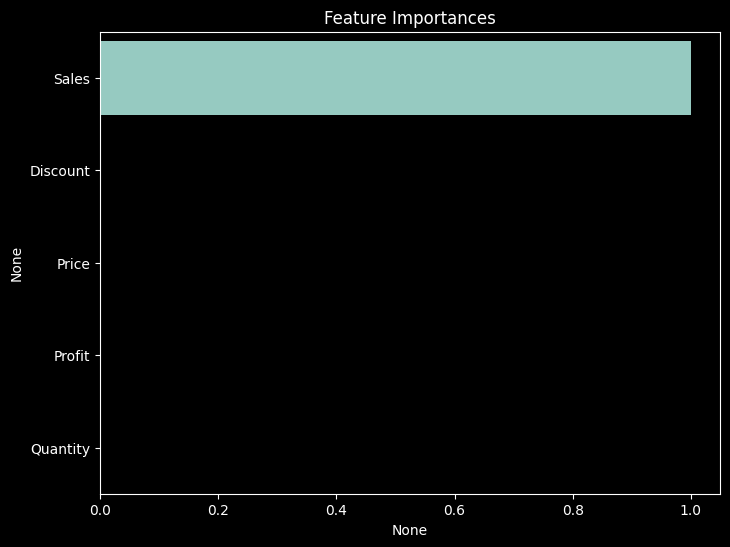

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [62]:
df.groupby('Region')['Sales'].mean().sort_values(ascending=False)

Region
West       0.168027
East       0.050203
South      0.031826
Central   -1.101568
Name: Sales, dtype: float64

#### 모델 Save and Read

In [63]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)